In [1]:
# imports
import requests
import pandas as pd
import os
import matplotlib.pyplot as plt

# Foursquare

In [4]:
headers = {
        "Accept": "application/json",
        "Authorization": "" #API Key removed
    }

Send a request to Foursquare with a small radius (1000m) for all the bike stations in your city of choice. 

In [2]:
### Define a function that uses a data frame as input to extract the Foursquare API outputs

def extract_foursquare_data(df,headers):


    #Empty object to store result
    foursquare_data_extract = []

    #Making API call for first 100 citybike stations & exporting few attributes to CSV files
    for index, row in df[:10].iterrows():
        lat = row['latitude']
        lng = row['longitude']
        url = f"https://api.foursquare.com/v3/places/nearby?ll={lat},{lng}"

        response = requests.request("GET", url, headers=headers)

        foursquare_data=response.json()

        for result in foursquare_data['results']:
            foursquare_data_extract.append({
                "fsq_id" : result['fsq_id'],
                "category_id" : result['categories'][0]['id'],
                "category_name" : result['categories'][0]['name'],
                "chains" : result['chains'],
                "distance" : result['distance'],
                "latitude" : result['geocodes']['main']['latitude'],
                "longitude" : result['geocodes']['main']['longitude'],  
                "location_country" : result.get('location', {}).get('country', None),
                "location_cross_street" : result.get('location', {}).get('cross_street', None),
                "location_formatted_address" : result['location']['formatted_address'],  
                "location_locality" : result.get('location', {}).get('locality', None),
                "location_postcode" : result.get('location', {}).get('postcode', None),  
                "location_region" : result.get('location', {}).get('region', None),   
                "location_timezone" : result['timezone'],   
                "name" : result['name']
                })
            df2 = pd.DataFrame(foursquare_data_extract)
            # Print the dataframe
            # print(df2)
    return df2

In [5]:
# Read citybikes data from csv file
df1 = pd.read_csv('C:/Taslim/LHL/Python Project/citybike.csv')

# Call the function on the citybike dataframe to pull the foursquare API results
foursquare_df = extract_foursquare_data(df1,headers)

Parse through the response to get the POI (such as restaurants, bars, etc) details you want (ratings, name, location, etc)

In [6]:
# Get the summary statistics of the data
print(foursquare_df.describe())

        category_id    distance   latitude  longitude
count     91.000000   91.000000  91.000000  91.000000
mean   14255.692308  104.780220  43.665023 -79.379603
std     2333.440268  118.180446   0.006836   0.037361
min    10004.000000    1.000000  43.652742 -79.451650
25%    13027.500000   30.500000  43.658205 -79.396353
50%    13145.000000   64.000000  43.664612 -79.383586
75%    16533.500000  135.000000  43.670554 -79.376672
max    19055.000000  581.000000  43.675715 -79.315069


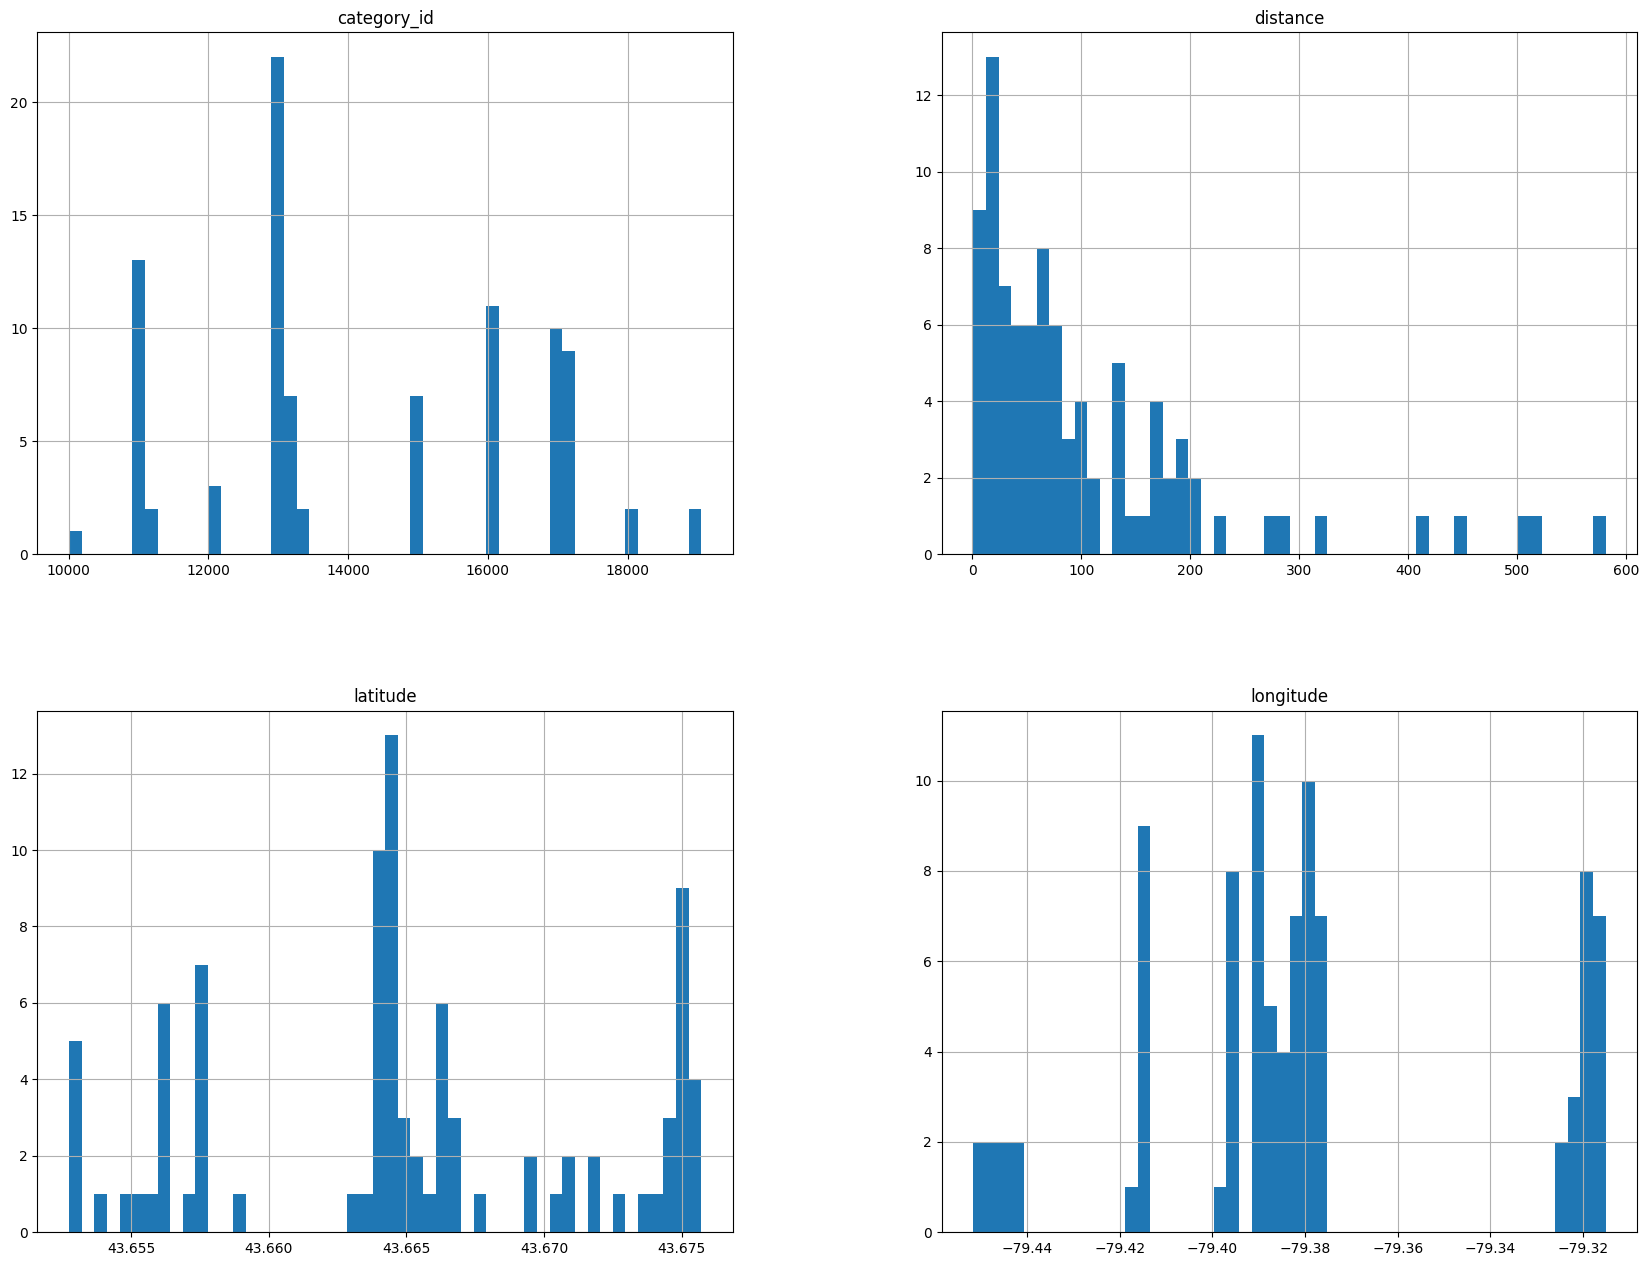

In [7]:

# Plot histograms to visualize the distribution of each numerical column
foursquare_df.hist(bins=50, figsize=(20,15))
plt.subplots_adjust(left=0.15, right=0.95, bottom=0.1, top=0.9)
plt.show()

Put your parsed results into a DataFrame

In [8]:
foursquare_df.to_csv('C:/Taslim/LHL/Python Project/foursquare.csv') 

# Yelp

Send a request to Yelp with a small radius (1000m) for all the bike stations in your city of choice. 

In [9]:
headers = {
        "accept": "application/json",
        "Authorization": "Bearer " #Key Removed    
        }

In [11]:
def extract_yelp_data(df1,headers):
    # Empty object for storing results
    #Basic Setup for API

    yelp_data_extract = []

    # Iterating through first 100 station to pull Yelp data
    for index, row in df1[:10].iterrows():
        lat = row['latitude']
        lng = row['longitude']
        url = "https://api.yelp.com/v3/businesses/search?latitude=" + str(lat) + "&longitude=" + str(lng)
        #print(url)
        response = requests.get(url, headers=headers)

        yelp_data = response.json()

        for result in yelp_data['businesses']:
            yelp_data_extract.append({
                "name" : result['name'],
                "rating" : result.get('rating', None),
                "review_count" : result.get('review_count', None),
                "price" : result.get('price', None),
                "distance" : result.get('distance', None),
                "category" : result.get('title', None),
                "latitude" : lat,
                "longitude" : lng
            })
        
    df3 = pd.DataFrame(yelp_data_extract)
    
    return df3
    

Parse through the response to get the POI (such as restaurants, bars, etc) details you want (ratings, name, location, etc)

In [12]:
# Call the function on the citybike dataframe to pull the foursquare API results
yelp_df = extract_yelp_data(df1,headers)

In [13]:
yelp_df.head()

,name,rating,review_count,price,distance,category,latitude,longitude
0,Descendant Detroit Style Pizza,4.5,418,$$,1048.126922,None,43.665269,-79.319796
1,Maha's,4.0,572,$$,1005.190035,None,43.665269,-79.319796
2,The Burger's Priest,3.5,503,$$,374.238073,None,43.665269,-79.319796
3,Completo,4.5,169,$,1184.032903,None,43.665269,-79.319796
4,Ed's Real Scoop,4.5,209,$$,1854.179445,None,43.665269,-79.319796


Put your parsed results into a DataFrame

In [14]:
# Get the summary statistics of the data
print(yelp_df.describe())

           rating  review_count     distance    latitude   longitude
count  200.000000    200.000000   200.000000  200.000000  200.000000
mean     4.222500    675.495000  1204.533174   43.664931  -79.381225
std      0.299487    650.552251   808.186981    0.007186    0.036829
min      3.500000     67.000000    16.625475   43.653236  -79.445947
25%      4.000000    245.250000   596.836808   43.657763  -79.396273
50%      4.000000    488.000000  1001.814486   43.664868  -79.385797
75%      4.500000    867.000000  1721.464320   43.671420  -79.376716
max      5.000000   3337.000000  3562.899333   43.675492  -79.317693


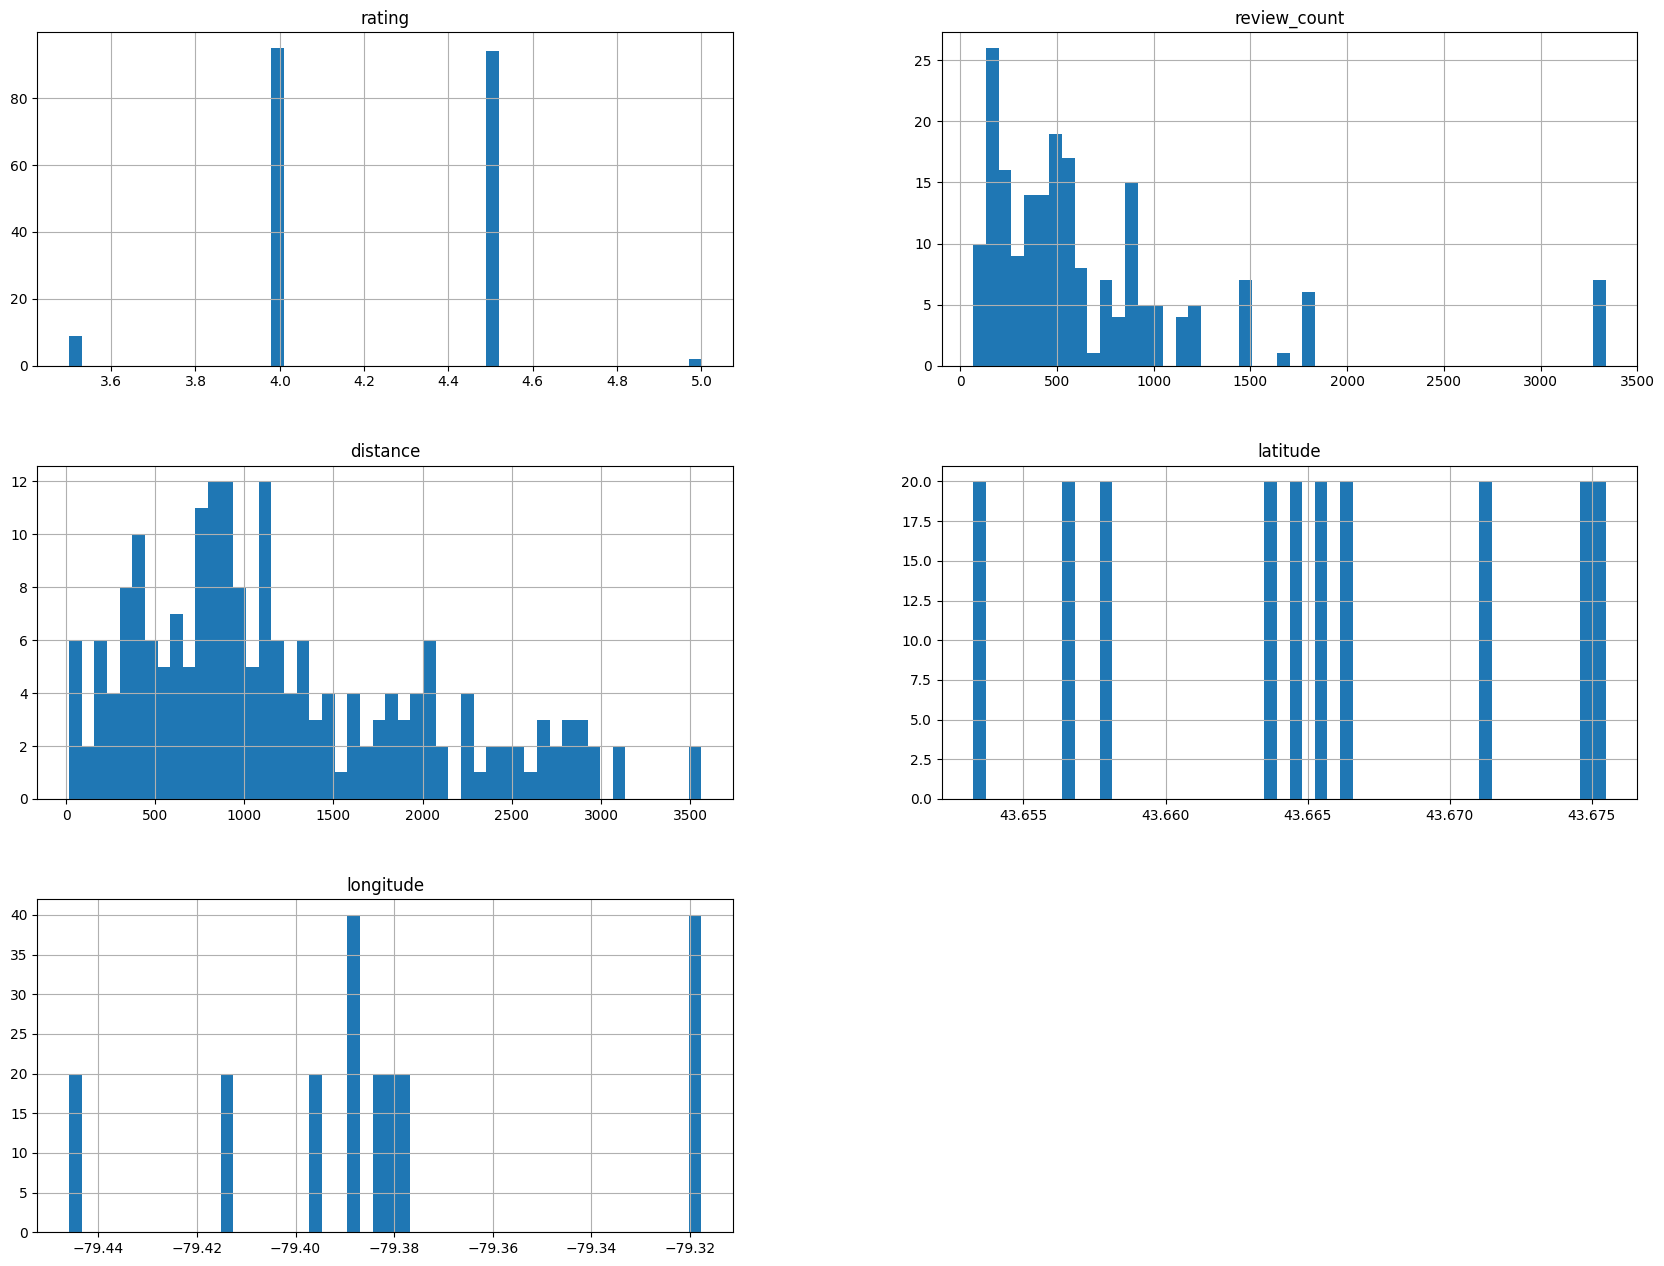

In [15]:
# Plot histograms to visualize the distribution of each numerical column
yelp_df.hist(bins=50, figsize=(20,15))
plt.subplots_adjust(left=0.15, right=0.95, bottom=0.1, top=0.9)
plt.show()

In [16]:
yelp_df.to_csv('C:/Taslim/LHL/Python Project/yelp.csv') 

# Comparing Results

Which API provided you with more complete data? Provide an explanation. 

The Yelp API provides more information such as ratings, no. of reviews and price for the business

Get the top 10 restaurants according to their rating

In [18]:
restaurants = yelp_df["businesses"]

# Sort the restaurants based on their rating in descending order
restaurants.sort(key=lambda x: x["rating"], reverse=True)

# Get the top 10 restaurants
top_10_restaurants = restaurants[:10]

# Print the name and rating of each of the top 10 restaurants
for restaurant in top_10_restaurants:
    print(f"{restaurant['name']} - {restaurant['rating']}")

KeyError: 'businesses'